In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport


In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
data=pd.read_csv('diabetes_reg_data.csv')

In [4]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [5]:
y=data.iloc[:,-1]

In [6]:
y=pd.DataFrame(y)

In [7]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


In [8]:
x=data.iloc[:,:-1]

In [9]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [10]:
model=DecisionTreeRegressor()

In [11]:
model.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
model.predict(x)

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
from sklearn.metrics import mean_squared_error


In [14]:
r=mean_squared_error(y,model.predict(x))

In [15]:
r

0.0

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=96)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
y_pred=model.predict(x_test)

In [20]:
#np.mean(np.abs((y_pred-y_test/y_test)

In [21]:
from numpy import linalg

In [23]:
np.linalg.inv([[1,2,3],[4,5,6],[7,8,9]])

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [ ]:
np.linal.

In [25]:
x1=np.random.uniform(1,10,100)
y1=5*x1+3+np.random.normal(0,1,100)

In [26]:
x2=np.random.uniform(7,9,30)
y2=8*x2+10+np.random.normal(0,1,30)

In [27]:
df=pd.DataFrame(columns=['x','y'])

In [28]:
df['x']=list(x1)+list(x2)

In [29]:
df['y']=list(y1)+list(y2)

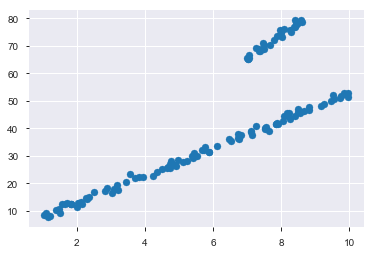

In [32]:
plt.scatter(df['x'],df['y'])


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [60]:
model.fit(np.)

ValueError: Expected 2D array, got 1D array instead:
array=[1.38960422 4.66580612 7.11519928 6.75622358 1.9921123  4.89130177
 3.16100592 1.56395429 5.23416353 8.24064635 5.76219895 8.65910676
 3.56762139 9.72743046 5.37370231 2.33935344 8.48367348 2.51188956
 4.4850982  4.90677128 3.7005355  3.44425517 9.25950359 8.05062726
 1.83616616 9.55850746 8.08360992 7.0990048  8.20146743 2.12902755
 9.94880089 7.24212708 1.09803114 2.30479312 3.07343246 5.44257948
 8.47575781 9.51169991 7.52945605 4.63628479 8.40147923 4.24294489
 6.12108101 8.16024966 7.87622036 1.50619533 2.14378356 7.52136276
 2.0618973  8.81680842 4.74507482 6.80568377 2.87309287 4.96688138
 9.82781002 5.7161791  9.74675779 3.82204914 1.69849763 5.41389781
 5.86456712 7.62596671 8.22798614 8.80714153 5.53598625 4.76987188
 2.27709086 3.20526574 9.4629455  3.03244794 7.84352624 3.94803554
 9.85624993 5.11809642 4.73212005 8.52344336 1.83680907 9.9579607
 1.04444154 6.46900379 5.668681   1.48025673 7.55890275 7.832622
 7.88752373 1.14959175 4.36210167 6.51943577 6.71713116 2.82672508
 1.64617082 2.03830644 9.16354229 8.53464588 5.88277587 1.21181308
 7.15118371 6.7395176  4.83974431 1.8240059  8.59695437 7.6613356
 7.01541725 7.0132338  7.96156491 8.25048505 8.27057387 7.06389367
 7.47766589 7.50123118 7.34628004 7.03946489 8.37695029 8.44462283
 8.39492564 7.99615644 7.47335037 8.58815449 8.48288592 8.07185184
 8.0295037  7.7944802  8.44392236 7.37448854 7.01108333 7.88051148
 7.34759758 8.3988663  7.24562387 7.00259777].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
y1=model.predict(x)

In [41]:
df['y'].shape

(130,)

In [43]:
df['x'].shape

(130,)

ValueError: Expected 2D array, got 1D array instead:
array=[1.38960422 4.66580612 7.11519928 6.75622358 1.9921123  4.89130177
 3.16100592 1.56395429 5.23416353 8.24064635 5.76219895 8.65910676
 3.56762139 9.72743046 5.37370231 2.33935344 8.48367348 2.51188956
 4.4850982  4.90677128 3.7005355  3.44425517 9.25950359 8.05062726
 1.83616616 9.55850746 8.08360992 7.0990048  8.20146743 2.12902755
 9.94880089 7.24212708 1.09803114 2.30479312 3.07343246 5.44257948
 8.47575781 9.51169991 7.52945605 4.63628479 8.40147923 4.24294489
 6.12108101 8.16024966 7.87622036 1.50619533 2.14378356 7.52136276
 2.0618973  8.81680842 4.74507482 6.80568377 2.87309287 4.96688138
 9.82781002 5.7161791  9.74675779 3.82204914 1.69849763 5.41389781
 5.86456712 7.62596671 8.22798614 8.80714153 5.53598625 4.76987188
 2.27709086 3.20526574 9.4629455  3.03244794 7.84352624 3.94803554
 9.85624993 5.11809642 4.73212005 8.52344336 1.83680907 9.9579607
 1.04444154 6.46900379 5.668681   1.48025673 7.55890275 7.832622
 7.88752373 1.14959175 4.36210167 6.51943577 6.71713116 2.82672508
 1.64617082 2.03830644 9.16354229 8.53464588 5.88277587 1.21181308
 7.15118371 6.7395176  4.83974431 1.8240059  8.59695437 7.6613356
 7.01541725 7.0132338  7.96156491 8.25048505 8.27057387 7.06389367
 7.47766589 7.50123118 7.34628004 7.03946489 8.37695029 8.44462283
 8.39492564 7.99615644 7.47335037 8.58815449 8.48288592 8.07185184
 8.0295037  7.7944802  8.44392236 7.37448854 7.01108333 7.88051148
 7.34759758 8.3988663  7.24562387 7.00259777].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

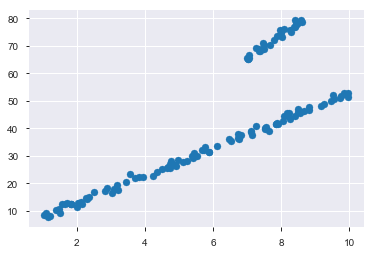

In [58]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],model.predict(df['x']))


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [61]:
x=df['x']

In [63]:
u=np.array(x)

In [64]:
u

array([1.38960422, 4.66580612, 7.11519928, 6.75622358, 1.9921123 ,
       4.89130177, 3.16100592, 1.56395429, 5.23416353, 8.24064635,
       5.76219895, 8.65910676, 3.56762139, 9.72743046, 5.37370231,
       2.33935344, 8.48367348, 2.51188956, 4.4850982 , 4.90677128,
       3.7005355 , 3.44425517, 9.25950359, 8.05062726, 1.83616616,
       9.55850746, 8.08360992, 7.0990048 , 8.20146743, 2.12902755,
       9.94880089, 7.24212708, 1.09803114, 2.30479312, 3.07343246,
       5.44257948, 8.47575781, 9.51169991, 7.52945605, 4.63628479,
       8.40147923, 4.24294489, 6.12108101, 8.16024966, 7.87622036,
       1.50619533, 2.14378356, 7.52136276, 2.0618973 , 8.81680842,
       4.74507482, 6.80568377, 2.87309287, 4.96688138, 9.82781002,
       5.7161791 , 9.74675779, 3.82204914, 1.69849763, 5.41389781,
       5.86456712, 7.62596671, 8.22798614, 8.80714153, 5.53598625,
       4.76987188, 2.27709086, 3.20526574, 9.4629455 , 3.03244794,
       7.84352624, 3.94803554, 9.85624993, 5.11809642, 4.73212

In [96]:
y=df['y']

In [97]:
v=np.array(y)

In [98]:
model.fit(u.reshape(-1,1),v.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
y3=model.predict(u.reshape(-1,1))

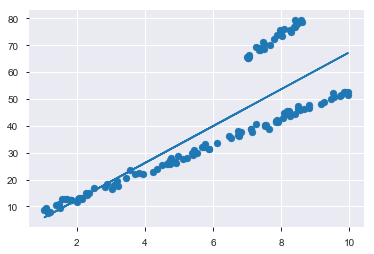

In [100]:
plt.scatter(df['x'],df['y'])
plt.plot(u,y2);

In [101]:
from sklearn.linear_model import Ridge

In [102]:
model2=Ridge(alpha=500)
model2.fit(np.array(df['x']).reshape(-1,1),np.array(df['y']).reshape(-1,1))

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
y2=model2.predict(np.array(df['x']).reshape(-1,1))

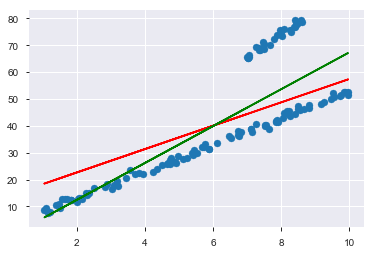

In [104]:
plt.scatter(df['x'],df['y'],label='truey')
plt.plot(u.reshape(-1,1),y2,color='red')
plt.plot(u.reshape(-1,1),y3,color='green')


In [81]:
from sklearn.linear_model import Lasso

In [105]:
model3=Lasso(alpha=10)

In [108]:
model3.fit(np.array(df['x']).reshape(-1,1),np.array(df['y']).reshape(-1,1))

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
y4=model3.predict(np.array(df['x']).reshape(-1,1))

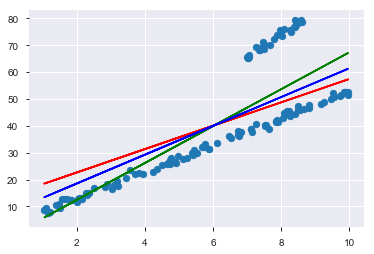

In [111]:
plt.scatter(df['x'],df['y'],label='truey')
plt.plot(u.reshape(-1,1),y2,color='red')
plt.plot(u.reshape(-1,1),y3,color='green')
plt.plot(u.reshape(-1,1),y4,color='blue')